# Importing Libraries

First we import the libraries necessary to analyze the data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utils as m

In [2]:
#load the cleaned data

incidents = pd.read_csv("../data/incidents_cleaned.csv", low_memory=False)
poverty = pd.read_csv("../data/poverty_cleaned.csv", low_memory=False)
districts = pd.read_csv("../data/districts_cleaned.csv", low_memory=False)

# and load our external data
population = pd.read_csv("../data/Population by Age and Sex - US, States, Counties.csv", low_memory=False)


In [3]:
incidents.info()
incidents = incidents.drop(
    columns=['participant_age1', 'participant_age_group1', 'participant_gender1', 'state_house_district',
             'state_senate_district', 'address'])
incidents.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216389 entries, 0 to 216388
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       216389 non-null  object 
 1   state                      216389 non-null  object 
 2   city_or_county             216389 non-null  object 
 3   address                    201681 non-null  object 
 4   latitude                   208488 non-null  float64
 5   longitude                  208488 non-null  float64
 6   congressional_district     204475 non-null  float64
 7   state_house_district       180606 non-null  float64
 8   state_senate_district      186659 non-null  float64
 9   participant_age1           147016 non-null  float64
 10  participant_age_group1     174409 non-null  object 
 11  participant_gender1        180045 non-null  object 
 12  min_age_participants       147020 non-null  float64
 13  avg_age_participants       14

,date,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,...,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,year,month,day
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,...,1,0,0,1,teen wounded while walking - security guard at...,shot - wounded/injured,NaN,2015,5,2
1,2017-04-03,Pennsylvania,Kane,41.6645,-78.7856,5.0,62.0,62.0,62.0,0.0,...,0,0,0,1,shot self after accident,"shot - dead (murder, accidental, suicide)",suicide^,2017,4,3
2,2016-11-05,Michigan,Detroit,42.4190,-83.0393,14.0,NaN,NaN,NaN,NaN,...,1,0,1,2,1 inj.,shot - wounded/injured,NaN,2016,11,5
3,2016-10-15,District of Columbia,Washington,38.9030,-76.9820,1.0,NaN,NaN,NaN,0.0,...,1,0,0,2,NaN,shot - wounded/injured,NaN,2016,10,15
4,2014-01-18,North Carolina,Wayne County,35.1847,-77.9527,13.0,65.0,65.0,65.0,0.0,...,1,0,0,1,NaN,shot - wounded/injured,home invasion,2014,1,18


In [4]:
incidents['incident_characteristics1'].unique()

value_counts = incidents['incident_characteristics1'].value_counts(dropna=False)
print(value_counts)

incident_characteristics1
shot - wounded/injured                                                                                  83570
shot - dead (murder, accidental, suicide)                                                               42821
non-shooting incident                                                                                   39696
shots fired - no injuries                                                                               31576
institution/group/business                                                                               4029
armed robbery with injury/death and/or evidence of dgu found                                             3444
tsa action                                                                                               2639
possession (gun(s) found during commission of other crimes)                                              1106
brandishing/flourishing/open carry/lost/found                                                 

In [5]:
# Define the categories
category_mapping = {
    'Shooting Casualty Incidents': [
        'shot - wounded/injured', 'shot - dead (murder, accidental, suicide)',
        # Add other characteristics from this category
    ],
    'Non-Fatal Shooting Incidents': [
        'shots fired - no injuries', 'shots fired, no action (reported, no evidence found)',
        # Add other characteristics from this category
    ],
    'Non-Shooting Gun-Related Incidents': [
        'institution/group/business', 'possession (gun(s) found during commission of other crimes)',
        # Add other characteristics from this category
    ],
    # 'Unspecified' category includes NaN values
    'Unspecified': [np.nan]
}


# Function to map incident characteristics to category indices
def map_to_category(characteristic):
    for category, characteristics in category_mapping.items():
        if pd.isna(characteristic) and pd.isna(characteristics[0]):
            return list(category_mapping.keys()).index(category) + 1  # Adding 1 to start indexing from 1
        elif characteristic in characteristics:
            return list(category_mapping.keys()).index(category) + 1  # Adding 1 to start indexing from 1
    return 0  # 0 represents 'Unspecified or Miscellaneous Incidents'


# Apply the mapping function to create a new column 'category_index'
incidents['category_index'] = incidents['incident_characteristics1'].apply(map_to_category)
incidents.head()

,date,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,...,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,year,month,day,category_index
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,...,0,0,1,teen wounded while walking - security guard at...,shot - wounded/injured,NaN,2015,5,2,1
1,2017-04-03,Pennsylvania,Kane,41.6645,-78.7856,5.0,62.0,62.0,62.0,0.0,...,0,0,1,shot self after accident,"shot - dead (murder, accidental, suicide)",suicide^,2017,4,3,1
2,2016-11-05,Michigan,Detroit,42.4190,-83.0393,14.0,NaN,NaN,NaN,NaN,...,0,1,2,1 inj.,shot - wounded/injured,NaN,2016,11,5,1
3,2016-10-15,District of Columbia,Washington,38.9030,-76.9820,1.0,NaN,NaN,NaN,0.0,...,0,0,2,NaN,shot - wounded/injured,NaN,2016,10,15,1
4,2014-01-18,North Carolina,Wayne County,35.1847,-77.9527,13.0,65.0,65.0,65.0,0.0,...,0,0,1,NaN,shot - wounded/injured,home invasion,2014,1,18,1


In [6]:
# we can now drop the incident_characteristics1, incident_characteristics2 and notes columns

incidents = incidents.drop(columns=['incident_characteristics1', 'incident_characteristics2', 'notes'])

In [7]:
incidents_and_poverty = pd.merge(incidents, poverty, on=['state', 'year'], how='inner')
incidents_and_poverty = incidents_and_poverty[['state', 'year', 'date', 'povertyPercentage']]


In [8]:
population = population[(population['Countyfips'] == 0) & (population['Year'] <= 2018) & (population['Year'] > 2013)]
population = population.drop(
    columns=['IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Population 0-4', 'Population 5-17', 'Population 18-24',
             'Population 25-44', 'Population 45-64', 'Population 65+'])
population = population.rename(columns={'Description': 'state', 'Year': 'year'})

In [9]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 14 to 63880
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                265 non-null    object 
 1   year                 265 non-null    int64  
 2   Total Population     265 non-null    float64
 3   Population Under 18  265 non-null    float64
 4   Population 18-54     265 non-null    float64
 5   Population 55+       265 non-null    float64
 6   Male Population      265 non-null    float64
 7   Female Population    265 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.6+ KB


In [10]:
# merge the population data with the incidents data

# Group incidents by year and state, calculate incident counts
incident_counts = incidents.groupby(['year', 'state']).size().reset_index(name='counts')

# Group population by year and state, summing the population
population_totals = population.groupby(['year', 'state'])['Total Population'].sum().reset_index()

# Merge incident counts and population totals on year and state
merged_data = pd.merge(incident_counts, population_totals, on=['year', 'state'], how='inner')

# Calculate Incident Density per 100k
merged_data['Incident Density per 100k'] = (merged_data['counts'] / merged_data['Total Population']) * 100000

# Append U.S. totals for each year
us_totals = merged_data.groupby('year').agg({'counts': 'sum', 'Total Population': 'sum'}).reset_index()
us_totals['state'] = 'U.S.'
us_totals['Incident Density per 100k'] = (us_totals['counts'] / us_totals['Total Population']) * 100000

# Append U.S. totals to the merged data
result = pd.concat([merged_data, us_totals]).reset_index(drop=True)[['year', 'state', 'Incident Density per 100k']]

incidents_density = pd.merge(incidents, result, on=['state', 'year'], how='inner')

In [11]:
incidents_density

,date,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,...,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year,month,day,category_index,Incident Density per 100k
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,...,0,1,0,0,1,2015,5,2,1,15.616436
1,2015-08-02,Indiana,Gary,41.5981,-87.3400,1.0,15.0,15.0,15.0,0.0,...,1,0,0,0,1,2015,8,2,1,15.616436
2,2015-04-15,Indiana,Indianapolis,39.7150,-86.2981,7.0,NaN,NaN,NaN,0.0,...,0,0,0,0,0,2015,4,15,0,15.616436
3,2015-12-18,Indiana,Evansville,37.9774,-87.5372,8.0,24.0,24.0,24.0,0.0,...,0,0,1,0,1,2015,12,18,0,15.616436
4,2015-05-14,Indiana,Gary,41.5982,-87.3488,1.0,32.0,46.0,59.0,0.0,...,1,0,0,1,2,2015,5,14,1,15.616436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216384,2018-03-24,Hawaii,Wailuku,NaN,NaN,NaN,26.0,26.0,26.0,0.0,...,0,0,1,0,1,2018,3,24,4,1.337470
216385,2018-01-07,Hawaii,Pahala,19.2000,-155.4800,2.0,33.0,33.0,33.0,0.0,...,0,0,1,0,1,2018,1,7,2,1.337470
216386,2018-03-05,Hawaii,Ocean View,19.1127,-155.7570,2.0,31.0,42.0,64.0,0.0,...,0,2,1,0,3,2018,3,5,1,1.337470
216387,2018-01-28,Hawaii,Waianae,21.4444,-158.1860,2.0,34.0,34.0,34.0,0.0,...,0,0,1,0,1,2018,1,28,2,1.337470


In [12]:
# save incidents_density to csv
incidents_density.to_csv("../data/extracted_features.csv", index=False)

In [13]:
gun_ownership = pd.read_excel("../data/TL-354-State-Level Estimates of Household Firearm Ownership.xlsx", sheet_name=1)
csv = gun_ownership.to_csv("../data/GunOwnership.csv", index=None, header=True)
gun_ownership = gun_ownership[gun_ownership['Year'] > 2013]
gun_ownership = gun_ownership[['Year', 'STATE', 'HFR', 'universl', 'permit']]
gun_ownership = gun_ownership.rename(columns={'Year': 'year', 'STATE': 'state'})

In [14]:
# to make sure the cleaning is the same

In [15]:
def preparing_df(df, df2, df3, df4, df5):
    df = df.drop(columns=['address', 'state_house_district', 'state_senate_district', 'participant_age1',
                          'participant_age_group1', 'participant_gender1'])
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df = df.drop(columns=['date'])
    df = df[(df['year'] > 2013) & (df['year'] < 2019)]
    # controlli semantici
    cols = ['min_age_participants', 'max_age_participants', 'avg_age_participants', 'n_participants_child',
            'n_participants_teen', 'n_participants_adult']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
    df['max_age_participants'] = np.where((df['max_age_participants'] < 0) | (df['max_age_participants'] > 115), np.nan,
                                          df['max_age_participants'])
    df['min_age_participants'] = np.where((df['min_age_participants'] < 0) | (df['min_age_participants'] > 115), np.nan,
                                          df['min_age_participants'])
    df['avg_age_participants'] = np.where((df['avg_age_participants'] < 0) | (df['avg_age_participants'] > 115), np.nan,
                                          df['avg_age_participants'])
    df['n_participants_child'] = np.where(
        (df['n_participants_child'] < 0) | (df['n_participants_child'] > df['n_participants']), np.nan,
        df['n_participants_child'])
    df['n_participants_teen'] = np.where(
        (df['n_participants_teen'] < 0) | (df['n_participants_teen'] > df['n_participants']), np.nan,
        df['n_participants_teen'])
    df['n_participants_adult'] = np.where(
        (df['n_participants_adult'] < 0) | (df['n_participants_adult'] > df['n_participants']), np.nan,
        df['n_participants_adult'])
    df['longitude'] = np.where(df['longitude'] > 0, df['longitude'] * -1, df['longitude'])
    #21968 = San Bernardino shooting
    #88653 = Florida school shooting
    #116161 = Colorado, gangs
    #180038 = Boston, gangs
    #152656 = Texas church shooting
    #236261 = Orlando shooting
    df = df.drop([21968, 88653, 116161, 180038, 152656, 236261])
    df2 = df2[(df2['year'] > 2013) & (df2['year'] < 2019)]
    df3 = df3[(df3['year'] > 2013) & (df3['year'] < 2019)]
    df3['state'] = df3['state'].str.title()
    df4 = df4[(df4['Countyfips'] == 0) & (df4['Year'] > 2013) & (df4['Year'] < 2019)]
    df4 = df4.drop(
        columns=['IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Population 0-4', 'Population 5-17', 'Population 18-24',
                 'Population 25-44', 'Population 45-64', 'Population 65+'])
    df4 = df4.rename(columns={'Year': 'year', 'Description': 'state'})

    return df, df2, df3, df4, df5

In [16]:
from feature_extractors import *

df = incidents_density
df2 = poverty
df3 = districts
df4 = population
df5 = gun_ownership

df = crime_to_poverty(df, df2)

In [17]:
df = average_age(df)

In [18]:
df = average_participants(df)

In [19]:
df = kill_to_gun(df, df5)

C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_kills['year'] = x
C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_kills['month'] = y
C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [20]:
df = poverty_to_gun(df, df2, df5)

In [21]:
df = minors_percentage(df, df4)

In [22]:
df = incidents_to_win(df, df3)

C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_results['year'] = x
C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_results['win_percentage'] = (year_results['candidatevotes'] / year_results['totalvotes']) * 100
C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [23]:
df

,date,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,...,day,category_index,Incident Density per 100k,crime_ratio,avg_age,avg_participants,kill_to_gun,poverty_to gun,minors_percentage,incidents_to_win
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,...,2,1,15.616436,6.829268,30.124509,1.626788,0.558376,0.312183,0.000102,16.562152
1,2015-05-14,Indiana,Gary,41.5982,-87.3488,1.0,32.0,46.0,59.0,0.0,...,14,1,15.616436,6.829268,30.124509,1.626788,0.558376,0.312183,0.000102,16.562152
2,2015-05-06,Indiana,Bloomington,39.1593,-86.5272,9.0,22.0,22.0,23.0,0.0,...,6,1,15.616436,6.829268,30.124509,1.626788,0.558376,0.312183,0.000102,16.562152
3,2015-05-18,Indiana,Richmond,39.8317,-84.8785,6.0,NaN,NaN,NaN,0.0,...,18,2,15.616436,6.829268,30.124509,1.626788,0.558376,0.312183,0.000102,16.562152
4,2015-05-15,Indiana,Gary,41.6123,-87.2685,1.0,25.0,25.0,25.0,0.0,...,15,1,15.616436,6.829268,30.124509,1.626788,0.558376,0.312183,0.000102,16.562152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216384,2015-04-18,North Dakota,Williston,48.1660,-103.6430,1.0,36.0,36.0,36.0,0.0,...,18,2,19.361700,0.545455,31.757412,1.334539,0.000000,0.218254,0.000023,2.628951
216385,2015-04-24,North Dakota,Williston,48.1768,-103.6310,1.0,NaN,NaN,NaN,0.0,...,24,0,19.361700,0.545455,31.757412,1.334539,0.000000,0.218254,0.000023,2.628951
216386,2015-04-29,North Dakota,Bismarck,46.7879,-100.7640,1.0,NaN,NaN,NaN,0.0,...,29,0,19.361700,0.545455,31.757412,1.334539,0.000000,0.218254,0.000023,2.628951
216387,2015-04-22,North Dakota,Dickinson,46.8829,-102.7910,1.0,NaN,NaN,NaN,NaN,...,22,0,19.361700,0.545455,31.757412,1.334539,0.000000,0.218254,0.000023,2.628951


<Axes: >

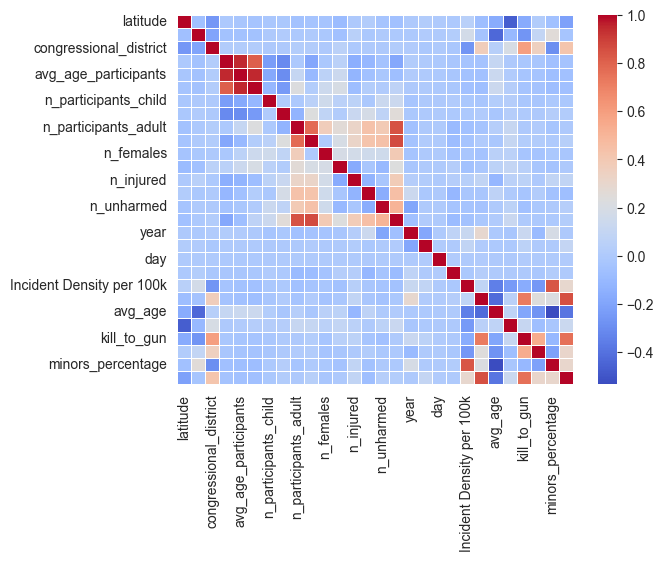

In [24]:
correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 10})

In [25]:
df.to_csv("../data/extracted_features.csv", index=False)